In [1]:
# imports #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, LSTM, Dropout
import keras.models

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-30,40.532501,41.814999,40.459999,41.314999,39.386459,169709600
1,2018-05-01,41.602501,42.299999,41.317501,42.275002,40.301651,214277600
2,2018-05-02,43.807499,44.437500,43.450001,44.142502,42.081985,266157600
3,2018-05-03,43.970001,44.375000,43.610001,44.222500,42.158237,136272800
4,2018-05-04,44.562500,46.062500,44.542500,45.957500,43.812252,224805200
...,...,...,...,...,...,...,...
1253,2023-04-21,165.050003,166.449997,164.490005,165.020004,165.020004,58311900
1254,2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
1255,2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
1256,2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800


In [4]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(0.8 * len(dataset)))

In [5]:
# scaling the data #

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
# creating the dataset #

train_data = scaled_data[0:training_data_len, :]

In [7]:
# splitting the dataset #

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
# converting the training lists into numpy arrays #

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# reshaping the data to fit the LSTM model #

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# creating the LSTM model #

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [11]:
# compile the model #

model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# training the model #

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 9s 81ms/step - loss: 0.0346
Epoch 2/50
30/30 [==============================] - 2s 82ms/step - loss: 0.0054
Epoch 3/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0044
Epoch 4/50
30/30 [==============================] - 3s 104ms/step - loss: 0.0037
Epoch 5/50
30/30 [==============================] - 2s 82ms/step - loss: 0.0037
Epoch 6/50
30/30 [==============================] - 3s 88ms/step - loss: 0.0033
Epoch 7/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0042
Epoch 8/50
30/30 [==============================] - 3s 112ms/step - loss: 0.0033
Epoch 9/50
30/30 [==============================] - 4s 125ms/step - loss: 0.0037
Epoch 10/50
30/30 [==============================] - 2s 81ms/step - loss: 0.0035
Epoch 11/50
30/30 [==============================] - 3s 89ms/step - loss: 0.0033
Epoch 12/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0039
Epoch 13/50
30/30 [===============

In [13]:
# creating the testing data set #

test_data = scaled_data[training_data_len-60: , :]

In [14]:
# creating the x and y testing sets #

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
# convert the test data into numpy arrays #
y_test = np.array(y_test)
x_test = np.array(x_test)

In [16]:
# reshape the array to be used as an input to the model #

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# get the models predicted price values #

predictions = model.predict(x_test)

8/8 [==============================] - 2s 37ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)

In [23]:
# evaluating the models performance #

rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE:", rmse)

RMSE: 0.9168977471461809


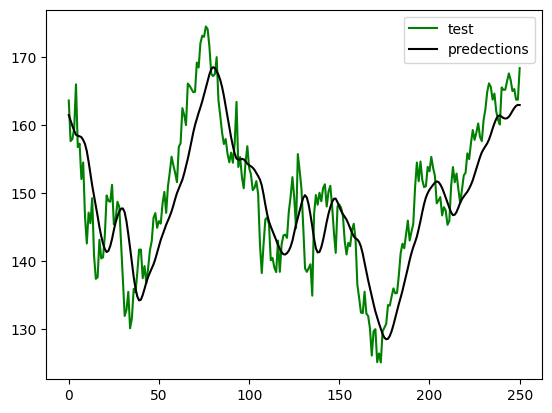

In [24]:
# plotting the data #
plt.plot(y_test, color = 'green', label = 'test')
plt.plot(predictions, color = 'black', label = 'predections')
plt.legend()
plt.show()

In [28]:
print(predictions)
print("------------")

[[161.48726]
 [160.68765]
 [159.90732]
 [159.17632]
 [158.58742]
 [158.44576]
 [158.35774]
 [158.2336 ]
 [157.81693]
 [157.2145 ]
 [156.17645]
 [154.61504]
 [152.87001]
 [151.09642]
 [149.60143]
 [148.14983]
 [146.59561]
 [144.98355]
 [143.6323 ]
 [142.54034]
 [141.72261]
 [141.29741]
 [141.48434]
 [142.18765]
 [143.23245]
 [144.53593]
 [145.69116]
 [146.56978]
 [147.2381 ]
 [147.69109]
 [147.72882]
 [147.14577]
 [145.8135 ]
 [143.94159]
 [141.89867]
 [139.72298]
 [137.6293 ]
 [135.9415 ]
 [134.74915]
 [134.16725]
 [134.2792 ]
 [134.96841]
 [135.86665]
 [136.83083]
 [137.63245]
 [138.27863]
 [138.87555]
 [139.49821]
 [140.28517]
 [141.24123]
 [142.19783]
 [143.09421]
 [143.85593]
 [144.5741 ]
 [145.32147]
 [145.95073]
 [146.58064]
 [147.29878]
 [148.18303]
 [149.12866]
 [149.99745]
 [150.65825]
 [151.30067]
 [151.97508]
 [152.8895 ]
 [153.97043]
 [155.04941]
 [156.28468]
 [157.6047 ]
 [158.88945]
 [160.02238]
 [160.94308]
 [161.81927]
 [162.63063]
 [163.51273]
 [164.49168]
 [165.50279]

In [29]:
print(y_test)

[[163.63999939]
 [157.6499939 ]
 [157.96000671]
 [159.47999573]
 [166.02000427]
 [156.77000427]
 [157.27999878]
 [152.05999756]
 [154.50999451]
 [146.5       ]
 [142.55999756]
 [147.11000061]
 [145.53999329]
 [149.24000549]
 [140.82000732]
 [137.3500061 ]
 [137.58999634]
 [143.11000061]
 [140.36000061]
 [140.52000427]
 [143.77999878]
 [149.63999939]
 [148.83999634]
 [148.71000671]
 [151.21000671]
 [145.38000488]
 [146.13999939]
 [148.71000671]
 [147.96000671]
 [142.63999939]
 [137.13000488]
 [131.88000488]
 [132.75999451]
 [135.42999268]
 [130.05999756]
 [131.55999756]
 [135.86999512]
 [135.3500061 ]
 [138.27000427]
 [141.66000366]
 [141.66000366]
 [137.44000244]
 [139.22999573]
 [136.72000122]
 [138.92999268]
 [141.55999756]
 [142.91999817]
 [146.3500061 ]
 [147.03999329]
 [144.86999512]
 [145.86000061]
 [145.49000549]
 [148.47000122]
 [150.16999817]
 [147.07000732]
 [151.        ]
 [153.03999329]
 [155.3500061 ]
 [154.08999634]
 [152.94999695]
 [151.6000061 ]
 [156.78999329]
 [157.35